In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nptdms import TdmsFile
from pathlib import Path
import math
import pathlib
import os
# importing sys
import sys
nb_path = Path.cwd()

In [2]:
pack_path = nb_path.parent / "src" #/"arenz_group_python"
print(nb_path.parent)
print(pack_path)
print(f"path existits: {pack_path.exists()}")

c:\Users\gustav.wiberg\Documents\GitHub\Python\Arenz_Group_Python
c:\Users\gustav.wiberg\Documents\GitHub\Python\Arenz_Group_Python\src
path existits: True


In [3]:
#add
sys.path.insert(0,str(pack_path))
import arenz_group_python
print(arenz_group_python.__path__)

loading arenz_group_python
['c:\\Users\\gustav.wiberg\\Documents\\GitHub\\Python\\Arenz_Group_Python\\src\\arenz_group_python']
['c:\\Users\\gustav.wiberg\\Documents\\GitHub\\Python\\Arenz_Group_Python\\src\\arenz_group_python']


In [4]:
import arenz_group_python.data_treatment
print(arenz_group_python.data_treatment.__path__)

['c:\\Users\\gustav.wiberg\\Documents\\GitHub\\Python\\Arenz_Group_Python\\src\\arenz_group_python\\data_treatment']


In [5]:
from arenz_group_python.data_treatment.ec_data import EC_Data
from arenz_group_python import *
from arenz_group_python import EC_Data
from arenz_group_python import CV_Data
from arenz_group_python import CV_Datas


In [6]:
str_path = str(pack_path)
#sys.path.append("C:/Users/gustav.wiberg/Documents/GitHub/Python/Arenz_Group_Python/src/ArenzGroupPython")
print(str_path)
sys.path.append(str_path)
#import ec_data
#ec_data.reload()
 

c:\Users\gustav.wiberg\Documents\GitHub\Python\Arenz_Group_Python\src


In [7]:
paths = []
path_to_dataSetFolder = nb_path / "data" / "set1"
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153559_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153541_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153333_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151300_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151725_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151512_ 3.tdms")

(-0.799159835069187, -0.7631323173532394)

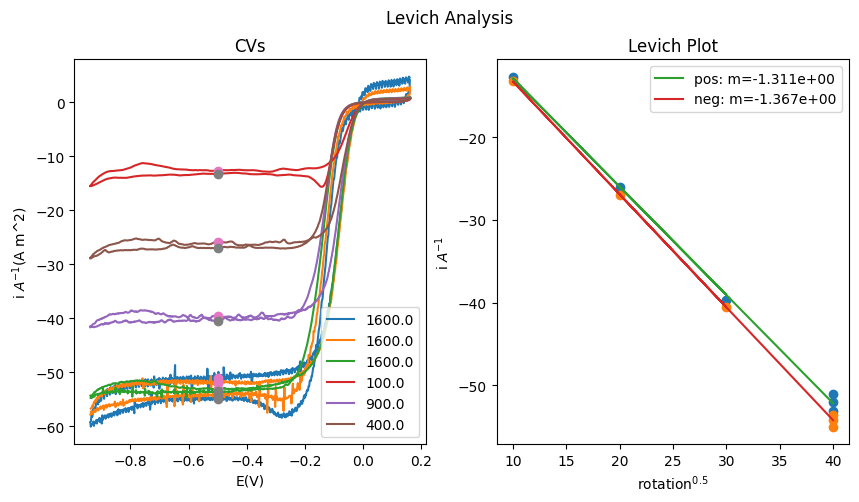

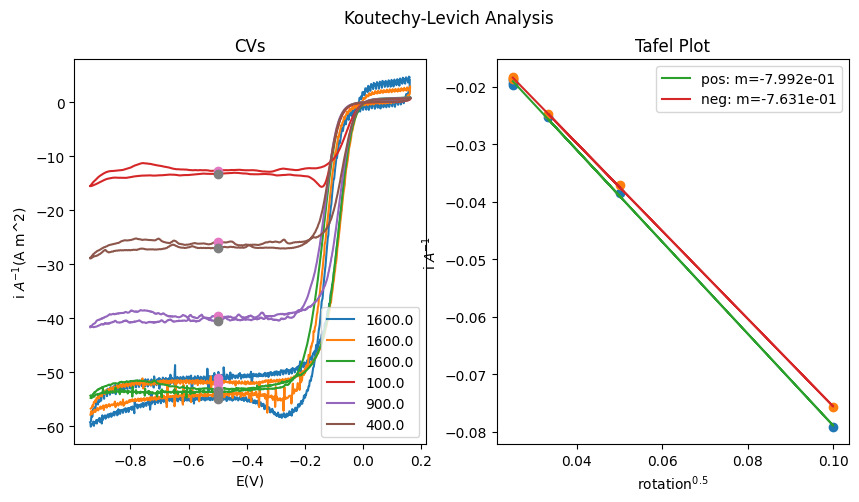

In [8]:
CVs = CV_Datas(paths)
CVs.Levich(-0.5)

CVs.KouLev(-0.5)

6
[40. 40. 40. 10. 30. 20.]
[-51.01220711 -52.00221152 -53.1023568  -12.63795428 -39.66609424
 -25.95898131]


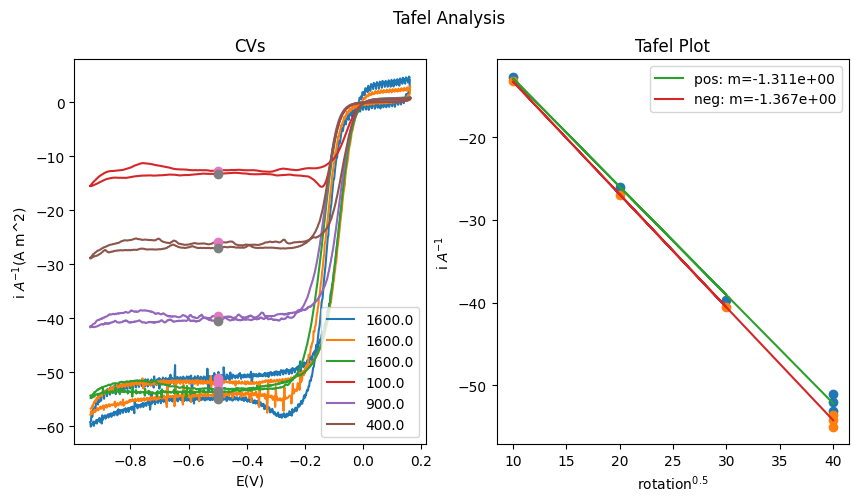

In [9]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.suptitle("Tafel Analysis")
CV_plot, Tafel_plot = fig.subplots(1,2)
CV_plot.title.set_text('CVs')

Tafel_plot.title.set_text('Tafel Plot')





path2 =[]
for x in path_to_dataSetFolder.iterdir():
        if x.is_file():

           path2.append(x)
        else:
            pass




CV_datas = [CV_Data() for i in range(len(paths))]
index=0
for path in paths:
    ec = EC_Data(path)
    cv= CV_Data()
    cv.conv(ec)
    #CV_datas.append(cv)
    CV_datas[index]=cv
    index=index+1 
print(index)

rot=[]
y = []
E = []
Epot=-0.5
y_axis_title =""
for cv in CV_datas:
    rot.append(math.sqrt(cv._rotation))
   
    cv.norm("area")
    cv.plot(plot = CV_plot, legend = cv._rotation)
    y.append(cv.get_i_at_E(Epot))
    E.append([Epot, Epot])
    y_axis_title= cv.i_label
    #print(cv.setup)
#print(rot)
rot = np.array(rot)
y = np.array(y)
CV_plot.plot(E,y, "o")
CV_plot.legend()
print(rot)
print(y[:,0])

Tafel_plot.plot(rot,y,'o')

Tafel_plot.set_xlabel("rotation$^{0.5}$")
Tafel_plot.set_ylabel(y_axis_title)
m, b = np.polyfit(rot, y[:,0], 1)
y_pos= m*rot+b
line,=Tafel_plot.plot(rot,y_pos,'-' )
line.set_label(f"pos: m={m:3.3e}")
m, b = np.polyfit(rot, y[:,1], 1)
y_neg= m*rot+b
line,=Tafel_plot.plot(rot,y_neg,'-' )
line.set_label(f"neg: m={m:3.3e}")
Tafel_plot.legend()
